We’ll use a combination of:

Prefix: dlx_ (Deep Learning + your custom project)

Camel case with random insertions like imgMatrix32, convZoner, etc.

Custom function names (like forgeDlxCnnModel())



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


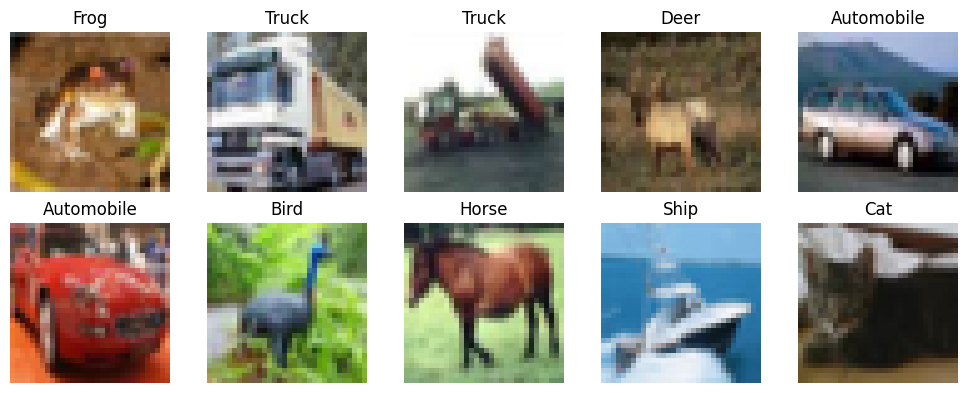

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(dlx_imgPool_train, dlx_tagMatrix_train), (dlx_imgPool_test, dlx_tagMatrix_test) = cifar10.load_data()    # Load and reshape dataset

dlx_imgPool_train = dlx_imgPool_train.astype('float32') / 255.0
dlx_imgPool_test = dlx_imgPool_test.astype('float32') / 255.0

dlx_encoded_train = to_categorical(dlx_tagMatrix_train, 10)
dlx_encoded_test = to_categorical(dlx_tagMatrix_test, 10)

dlx_classNamesArray = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                       'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 4))
for sampleIndex in range(10):
    plt.subplot(2, 5, sampleIndex + 1)
    plt.imshow(dlx_imgPool_train[sampleIndex])
    plt.title(dlx_classNamesArray[dlx_tagMatrix_train[sampleIndex][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# ** CNN Model Construction**

In [ ]:
from tensorflow.keras import models, layers

def forgeDlxCnnModel():
    cnnForge = models.Sequential()

    cnnForge.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))  # CNN constructor
    cnnForge.add(layers.BatchNormalization())
    cnnForge.add(layers.MaxPooling2D((2, 2)))

    cnnForge.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnnForge.add(layers.BatchNormalization())
    cnnForge.add(layers.MaxPooling2D((2, 2)))

    cnnForge.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnnForge.add(layers.BatchNormalization())
    cnnForge.add(layers.MaxPooling2D((2, 2)))

    cnnForge.add(layers.Flatten())
    cnnForge.add(layers.Dense(128, activation='relu'))
    cnnForge.add(layers.Dropout(0.4))
    cnnForge.add(layers.Dense(10, activation='softmax'))

    return cnnForge

dlx_modelNet = forgeDlxCnnModel()
dlx_modelNet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Compile and Train

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

dlx_modelNet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',                 # Compile
    metrics=['accuracy']
)

earlyDlxGuard = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
bestSaverGate = ModelCheckpoint("dlx_bestVisionNet.h5", monitor='val_accuracy', save_best_only=True)

dlx_historyBank = dlx_modelNet.fit(
    dlx_imgPool_train, dlx_encoded_train,
    validation_data=(dlx_imgPool_test, dlx_encoded_test),
    epochs=9,                                 # Train
    batch_size=64,
    callbacks=[earlyDlxGuard, bestSaverGate]
)


Epoch 1/9
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8400 - loss: 0.4565

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8400 - loss: 0.4565 - val_accuracy: 0.7614 - val_loss: 0.7876
Epoch 2/9
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8561 - loss: 0.4066 - val_accuracy: 0.7519 - val_loss: 0.8411
Epoch 3/9
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8644 - loss: 0.3745 - val_accuracy: 0.7564 - val_loss: 0.8696
Epoch 4/9
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8759 - loss: 0.3511 - val_accuracy: 0.7580 - val_loss: 0.8761
Epoch 5/9
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8906 - loss: 0.3077

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8905 - loss: 0.3079 - val_accuracy: 0.7706 - val_loss: 0.8807


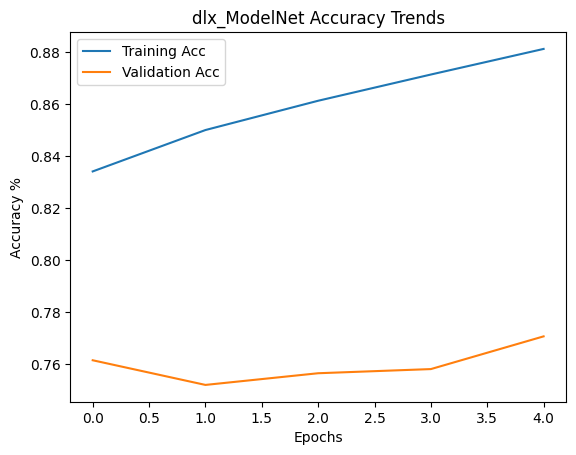

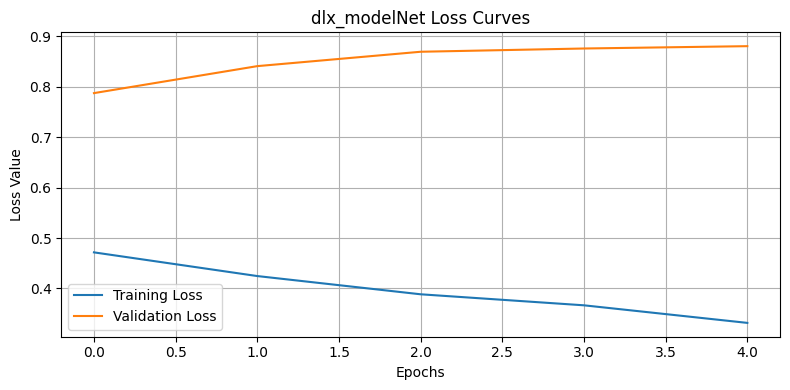

In [ ]:
# Accuracy Plot
plt.plot(dlx_historyBank.history['accuracy'], label='Training Acc')
plt.plot(dlx_historyBank.history['val_accuracy'], label='Validation Acc')
plt.title('dlx_ModelNet Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(dlx_historyBank.history['loss'], label='Training Loss')
plt.plot(dlx_historyBank.history['val_loss'], label='Validation Loss')
plt.title('dlx_modelNet Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate 
dlx_testLoss, dlx_testAccuracy = dlx_modelNet.evaluate(
    dlx_imgPool_test, dlx_encoded_test, verbose=2
)

print(f"\n🎯 dlx_modelNet Test Accuracy: {dlx_testAccuracy:.4f}")
print(f"🧮 dlx_modelNet Test Loss: {dlx_testLoss:.4f}")


313/313 - 1s - 5ms/step - accuracy: 0.7614 - loss: 0.7876

🎯 dlx_modelNet Test Accuracy: 0.7614
🧮 dlx_modelNet Test Loss: 0.7876


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#  predictions classification report for model
dlx_testPredictions = dlx_modelNet.predict(dlx_imgPool_test)
dlx_predictedClasses = np.argmax(dlx_testPredictions, axis=1)
dlx_trueClasses = np.argmax(dlx_encoded_test, axis=1)

dlx_classLabels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print("\n📋 dlx_modelNet Classification Report:")
print(classification_report(dlx_trueClasses, dlx_predictedClasses, target_names=dlx_classLabels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📋 dlx_modelNet Classification Report:
              precision    recall  f1-score   support

    Airplane       0.73      0.85      0.79      1000
  Automobile       0.89      0.84      0.87      1000
        Bird       0.64      0.70      0.67      1000
         Cat       0.62      0.55      0.58      1000
        Deer       0.76      0.69      0.72      1000
         Dog       0.71      0.63      0.66      1000
        Frog       0.76      0.89      0.82      1000
       Horse       0.84      0.77      0.81      1000
        Ship       0.88      0.84      0.86      1000
       Truck       0.79      0.87      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



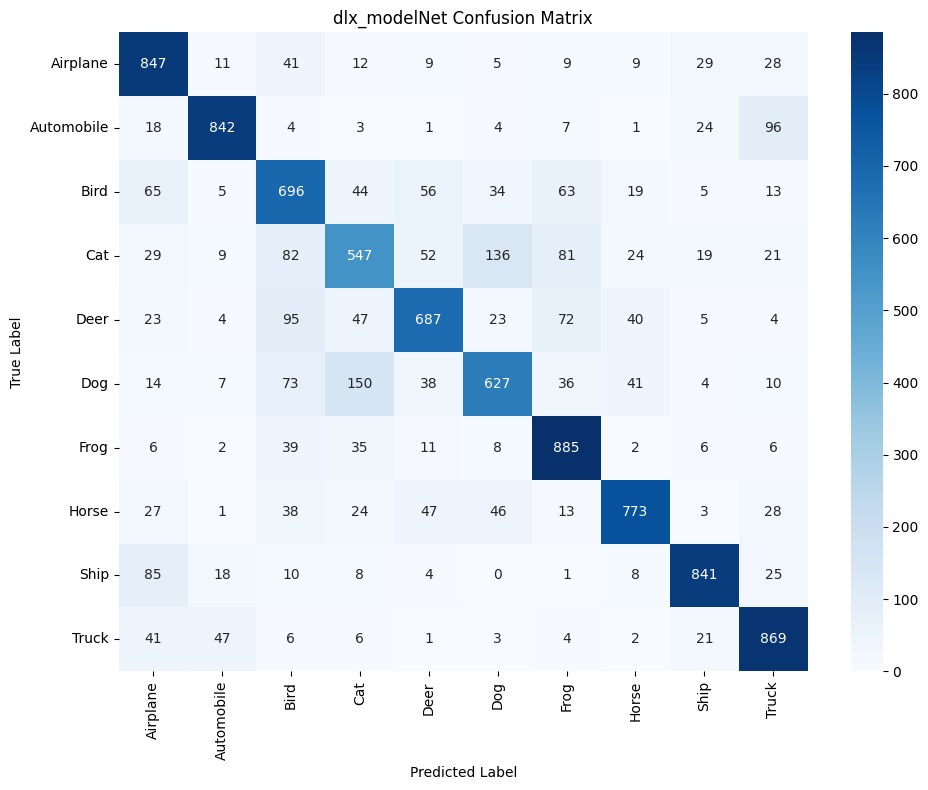

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dlx_confMatrix = confusion_matrix(dlx_trueClasses, dlx_predictedClasses)

plt.figure(figsize=(10, 8))
sns.heatmap(dlx_confMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dlx_classLabels,
            yticklabels=dlx_classLabels)
plt.title("dlx_modelNet Confusion Matrix")   #this metrix used for better model performance
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
#  Save model 
dlx_modelNet.save("dlx_bestVisionNet.h5")
print("✅ dlx_modelNet has been saved successfully as dlx_bestVisionNet.h5")


✅ dlx_modelNet has been saved successfully as dlx_bestVisionNet.h5
